<a href="https://colab.research.google.com/github/rennyjkim/CS146/blob/main/PS3/PS3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
from PIL import Image

In [ ]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/COMSCI M146/HW/PS3/data"


ps3_test.csv  ps3_train.csv  ps3_valid.csv


In [ ]:
######################################################################
# OneLayerNetwork
######################################################################

class OneLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(OneLayerNetwork, self).__init__()

        ### ========== TODO : START ========== ###
        ### part d: implement OneLayerNetwork with torch.nn.Linear
        self.OneLayerNetwork = torch.nn.Linear(784, 3)
        ### ========== TODO : END ========== ###

    def forward(self, x):
        # x.shape = (n_batch, n_features)

        ### ========== TODO : START ========== ###
        ### part d: implement the foward function
        outputs = self.OneLayerNetwork(x)

        ### ========== TODO : END ========== ###
        return outputs

In [ ]:
######################################################################
# TwoLayerNetwork
######################################################################

class TwoLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(TwoLayerNetwork, self).__init__()
        ### ========== TODO : START ========== ###
        ### part g: implement TwoLayerNetwork with torch.nn.Linear
        self.TwoLayerNetwork_first = torch.nn.Linear(784,400)
        self.TwoLayerNetwork_second = torch.nn.Linear(400,3)
        ### ========== TODO : END ========== ###

    def forward(self, x):
        # x.shape = (n_batch, n_features)

        ### ========== TODO : START ========== ###
        ### part g: implement the foward function
        OLN =  self.TwoLayerNetwork_first(x)
        sigmoid = torch.nn.Sigmoid()
        OLN = sigmoid(OLN)
        outputs = self.TwoLayerNetwork_second(OLN)
        ### ========== TODO : END ========== ###
        return outputs

In [ ]:
# load data from csv
# X.shape = (n_examples, n_features), y.shape = (n_examples, )
def load_data(filename):
    data = np.loadtxt(filename)
    y = data[:, 0].astype(int)
    X = data[:, 1:].astype(np.float32) / 255
    return X, y

In [ ]:
# plot one example
# x.shape = (features, )
def plot_img(x):
    x = x.reshape(28, 28)
    img = Image.fromarray(x*255)
    plt.figure()
    plt.imshow(img)
    return

In [ ]:
def evaluate_loss(model, criterion, dataloader):
    model.eval()
    total_loss = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        total_loss += loss.item()

    return total_loss / len(dataloader)

In [ ]:
def evaluate_acc(model, dataloader):
    model.eval()
    total_acc = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        predictions = torch.argmax(outputs, dim=1)
        total_acc += (predictions==batch_y).sum()

    return total_acc / len(dataloader.dataset)

In [ ]:
def train(model, criterion, optimizer, train_loader, valid_loader, epochs=31):
    train_loss_list = []
    valid_loss_list = []
    train_acc_list = []
    valid_acc_list = []
    for epoch in range(1, epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            pass
            ### ========== TODO : START ========== ###
            ### part f: implement the training process
            pred_y = model.forward(batch_X)
            model.zero_grad()
            loss = criterion(pred_y, batch_y)
            loss.backward()
            optimizer.step()
            ### ========== TODO : END ========== ###

        train_loss = evaluate_loss(model, criterion, train_loader)
        valid_loss = evaluate_loss(model, criterion, valid_loader)
        train_acc = evaluate_acc(model, train_loader)
        valid_acc = evaluate_acc(model, valid_loader)
        train_loss_list.append(train_loss)
        valid_loss_list.append(valid_loss)
        train_acc_list.append(train_acc)
        valid_acc_list.append(valid_acc)

        print(f"| epoch {epoch:2d} | train loss {train_loss:.6f} | train acc {train_acc:.6f} | valid loss {valid_loss:.6f} | valid acc {valid_acc:.6f} |")

    return train_loss_list, valid_loss_list, train_acc_list, valid_acc_list

In [ ]:
######################################################################
# main
######################################################################

# def main():

# fix random seed
np.random.seed(0)
torch.manual_seed(0)

# load data with correct file path

### ========== TODO : START ========== ###
data_directory_path =  "/content/drive/My Drive/COMSCI M146/HW/PS3/data"
### ========== TODO : END ========== ###

# X.shape = (n_examples, n_features)
# y.shape = (n_examples, )
X_train, y_train = load_data(os.path.join(data_directory_path, "ps3_train.csv"))
X_valid, y_valid = load_data(os.path.join(data_directory_path, "ps3_valid.csv"))
X_test, y_test = load_data(os.path.join(data_directory_path, "ps3_test.csv"))

### ========== TODO : START ========== ###
### part a: print out three training images with different labels

# not sure if hes looking for specific ones, if not, lets change these up
plot_img(X_train[1])
plot_img(X_train[17])
plot_img(X_train[295])


### ========== TODO : END ========== ###

print("Data preparation...")
print(X_train.shape, X_test.shape)

### ========== TODO : START ========== ###
### part b: convert numpy arrays to tensors
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)

X_valid = torch.from_numpy(X_valid)
y_valid = torch.from_numpy(y_valid)

X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test)

### ========== TODO : END ========== ###

### ========== TODO : START ========== ###
### part c: prepare dataloaders for training, validation, and testing
###         we expect to get a batch of pairs (x_n, y_n) from the dataloader
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=10)
valid_loader = DataLoader(TensorDataset(X_valid, y_valid), batch_size=10)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=10)



### ========== TODO : END ========== ###

### ========== TODO : START ========== ###
### part e: prepare OneLayerNetwork, criterion, and optimizer
model_one = OneLayerNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_one.parameters(), lr=0.0005)

### ========== TODO : END ========== ###

print("Start training OneLayerNetwork...")
results_one = train(model_one, criterion, optimizer, train_loader, valid_loader, epochs=31)
print("Done!")

### ========== TODO : START ========== ###
### part h: prepare TwoLayerNetwork, criterion, and optimizer
model_two = TwoLayerNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_two.parameters(), lr=0.0005)
### ========== TODO : END ========== ###

print("Start training TwoLayerNetwork...")
results_two = train(model_two, criterion, optimizer, train_loader, valid_loader, epochs=31)
print("Done!")

one_train_loss, one_valid_loss, one_train_acc, one_valid_acc = results_one
two_train_loss, two_valid_loss, two_train_acc, two_valid_acc = results_two

NameError: ignored

The test accuracy of the one Layer NN is: 
tensor(0.9600)
The test accuracy of the two Layer NN is: 
tensor(0.9000)


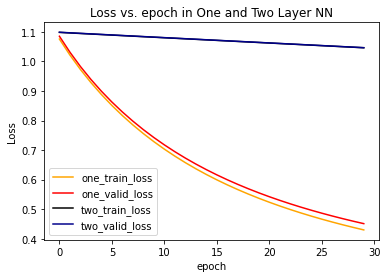

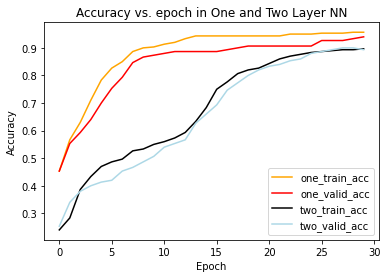

In [ ]:

### ========== TODO : START ========== ###
### part i: generate a plot to compare one_train_loss, one_valid_loss, two_train_loss, two_valid_loss
epoch = np.arange(30)
plt.plot(epoch, one_train_loss, color = 'orange', label = "one_train_loss")
plt.plot(epoch, one_valid_loss, color = 'red', label = "one_valid_loss")
plt.legend()
plt.title("Loss vs. epoch in One Layer NN")
plt.xlabel("epoch")
plt.ylabel("Loss")


plt.plot(epoch, two_train_loss, color = 'black', label = "two_train_loss")
plt.plot(epoch, two_valid_loss, color = 'darkblue', label = "two_valid_loss")
plt.legend()
plt.title("Loss vs. epoch in One and Two Layer NN")
plt.xlabel("epoch")
plt.ylabel("Loss")

### ========== TODO : END ========== ###

### ========== TODO : START ========== ###
### part j: generate a plot to compare one_train_acc, one_valid_acc, two_train_acc, two_valid_acc

plt.figure(2)
plt.plot(epoch, one_train_acc, color = 'orange', label = "one_train_acc")
plt.plot(epoch, one_valid_acc, color = 'red', label = "one_valid_acc")

plt.plot(epoch, two_train_acc, color = 'black', label = "two_train_acc")
plt.plot(epoch, two_valid_acc, color = 'lightblue', label = "two_valid_acc")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. epoch in One and Two Layer NN")


### ========== TODO : END ========== ##

### ========== TODO : START ========== ###
### part k: calculate the test accuracy
print("The test accuracy of the one Layer NN is: ")
print(evaluate_acc(model_one, test_loader))

print("The test accuracy of the two Layer NN is: ")
print(evaluate_acc(model_two, test_loader))


### ========== TODO : END ========== ###




Start training OneLayerNetwork Adam...
| epoch  1 | train loss 0.666445 | train acc 0.930000 | valid loss 0.675100 | valid acc 0.913333 |
| epoch  2 | train loss 0.457828 | train acc 0.956667 | valid loss 0.472110 | valid acc 0.946667 |
| epoch  3 | train loss 0.345870 | train acc 0.970000 | valid loss 0.363419 | valid acc 0.946667 |
| epoch  4 | train loss 0.279556 | train acc 0.976667 | valid loss 0.299496 | valid acc 0.946667 |
| epoch  5 | train loss 0.235981 | train acc 0.976667 | valid loss 0.257903 | valid acc 0.953333 |
| epoch  6 | train loss 0.204994 | train acc 0.976667 | valid loss 0.228634 | valid acc 0.960000 |
| epoch  7 | train loss 0.181646 | train acc 0.980000 | valid loss 0.206828 | valid acc 0.960000 |
| epoch  8 | train loss 0.163284 | train acc 0.980000 | valid loss 0.189881 | valid acc 0.966667 |
| epoch  9 | train loss 0.148367 | train acc 0.980000 | valid loss 0.176283 | valid acc 0.966667 |
| epoch 10 | train loss 0.135942 | train acc 0.980000 | valid loss 0.1

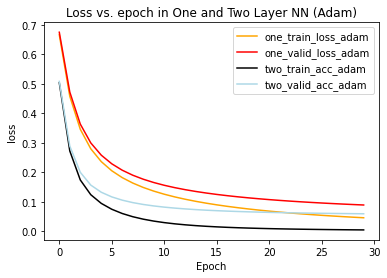

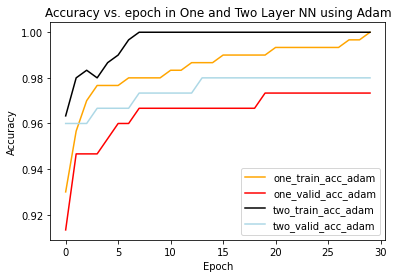

In [ ]:
### ========== TODO : START ========== ###
### part l: replace the SGD optimizer with the Adam optimizer and do the experiments again

model_three = OneLayerNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_three.parameters(), lr=0.0005)

print("Start training OneLayerNetwork Adam...")
results_three = train(model_three, criterion, optimizer, train_loader, valid_loader, epochs=31)
print("Done!")

model_four = TwoLayerNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_four.parameters(), lr=0.0005)

print("Start training TwoLayerNetwork Adam...")
results_four = train(model_four, criterion, optimizer, train_loader, valid_loader, epochs=31)
print("Done!")

one_train_loss_adam, one_valid_loss_adam, one_train_acc_adam, one_valid_acc_adam = results_three
two_train_loss_adam, two_valid_loss_adam, two_train_acc_adam, two_valid_acc_adam = results_four

### Plots
plt.figure(3)
plt.plot(epoch, one_train_loss_adam, color = 'orange', label = "one_train_loss_adam")
plt.plot(epoch, one_valid_loss_adam, color = 'red', label = "one_valid_loss_adam")

plt.plot(epoch, two_train_loss_adam, color = 'black', label = "two_train_acc_adam")
plt.plot(epoch, two_valid_loss_adam, color = 'lightblue', label = "two_valid_acc_adam")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.title("Loss vs. epoch in One and Two Layer NN (Adam)")

plt.figure(4)
plt.plot(epoch, one_train_acc_adam, color = 'orange', label = "one_train_acc_adam")
plt.plot(epoch, one_valid_acc_adam, color = 'red', label = "one_valid_acc_adam")

plt.plot(epoch, two_train_acc_adam, color = 'black', label = "two_train_acc_adam")
plt.plot(epoch, two_valid_acc_adam, color = 'lightblue', label = "two_valid_acc_adam")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. epoch in One and Two Layer NN using Adam")

print("The test accuracy of the one Layer NN using Adam is: ")
print(evaluate_acc(model_three, test_loader))

print("The test accuracy of the two Layer NN using Adam is: ")
print(evaluate_acc(model_four, test_loader))

### ========== TODO : END ========== ###